# What have we been watching on Netflix?

Let's load some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))

## Load data

In [2]:
# Let's load the data

movies = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-29/movies.csv')
shows = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-29/shows.csv')

In [3]:
# First, lets create a function to transform release_date into datetime

def set_dtypes(dataf):
    """
    This function transform release_date and runtime to the right fomat
    """
    return (dataf
        .assign(release_date = lambda d: pd.to_datetime(d['release_date'], format='%Y-%m-%d'))
        .assign(runtime = lambda d: pd.to_timedelta(d['runtime'].str.replace('H', 'h').str.replace('M', 'min').str.replace('S', 's')))
           )

In [4]:
movies = movies.pipe(set_dtypes)
shows = shows.pipe(set_dtypes)

In [5]:
movies.head()

,source,report,title,available_globally,release_date,hours_viewed,runtime,views
0,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,0 days 01:54:00,164700000.0
1,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,0 days 01:48:00,102900000.0
2,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,0 days 02:05:00,95500000.0
3,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,0 days 01:49:00,87500000.0
4,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,0 days 01:47:00,86900000.0


In [6]:
shows.head()

,source,report,title,available_globally,release_date,hours_viewed,runtime,views
0,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Adolescence: Limited Series,Yes,2025-03-13,555100000.0,0 days 03:50:00,144800000.0
1,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Squid Game: Season 2 // 오징어 게임: 시즌 2,Yes,2024-12-26,840300000.0,0 days 07:10:00,117300000.0
2,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Squid Game: Season 3 // 오징어 게임: 시즌 3,Yes,2025-06-27,438600000.0,0 days 06:08:00,71500000.0
3,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Zero Day: Limited Series,Yes,2025-02-20,315800000.0,0 days 05:09:00,61300000.0
4,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Missing You: Limited Series,Yes,2025-01-01,218600000.0,0 days 03:46:00,58000000.0


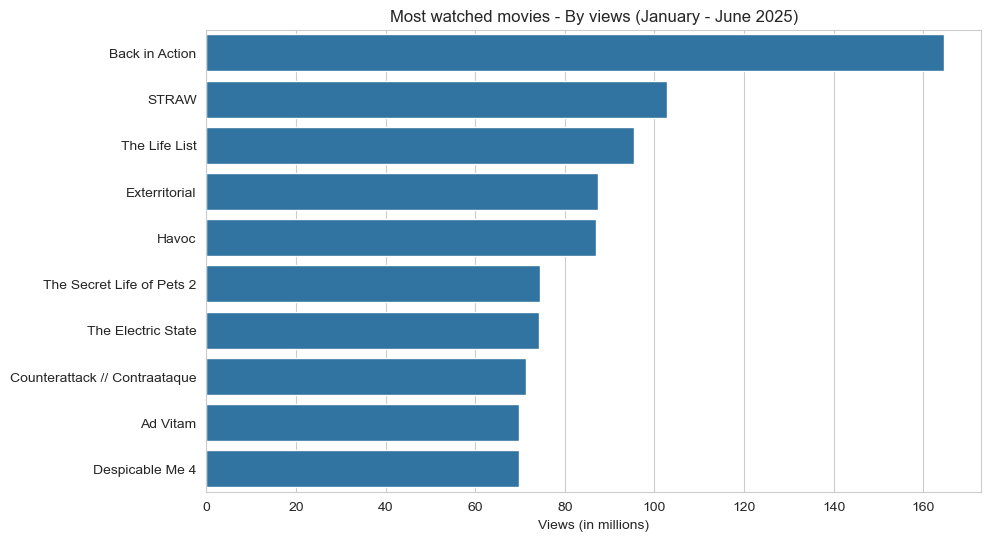

In [7]:
# Most watched movies by views (January - June 2025) in millions

df1 = (
    movies
        .query('report == "2025Jan-Jun"')
        .sort_values(by='views', ascending=False)
        .assign(views = lambda x: x['views'].div(1000000))
        .iloc[:, [2, 7]]
        .head(10)
)

sns.set_style('whitegrid')
sns.barplot(data=df1,
            x='views',
            y='title')
plt.title('Most watched movies - By views (January - June 2025)')
plt.xlabel('Views (in millions)')
plt.ylabel(None);

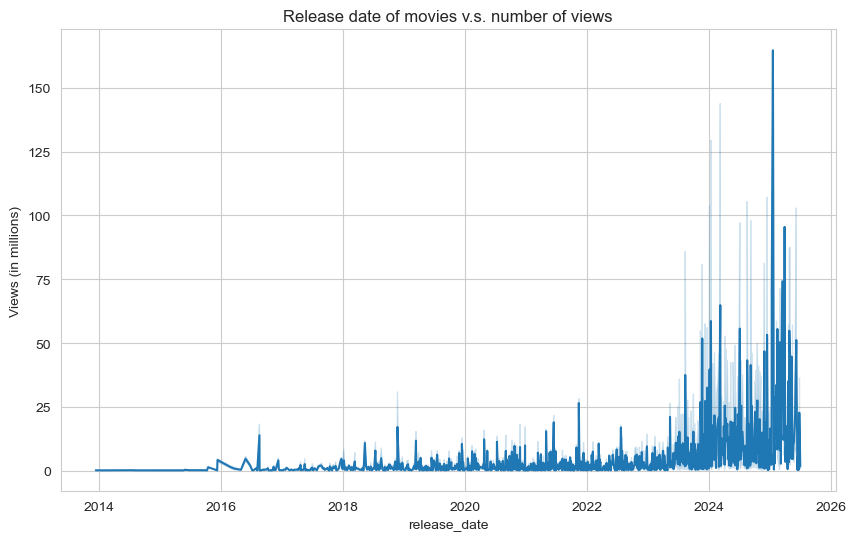

In [8]:
# What is the relation between time since release and current viewing performance? Do older shows have staying power or do newer releases dominate?

df2 = (
    movies
        .assign(views = lambda x: x['views'].div(1000000))
        .iloc[:, [4, 7]]
)

sns.lineplot(data=df2,
             x='release_date',
             y='views')
plt.title('Release date of movies v.s. number of views')
plt.ylabel('Views (in millions)');

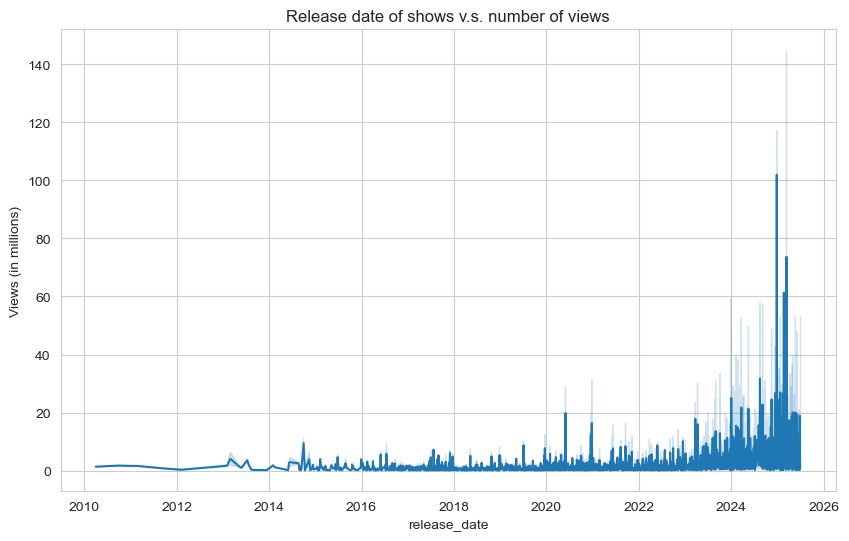

In [9]:
# What is the relation between time since release and current viewing performance? Do older shows have staying power or do newer releases dominate?

df3 = (
    shows
        .assign(views = lambda x: x['views'].div(1000000))
        .iloc[:, [4, 7]]
)

sns.lineplot(data=df3,
             x='release_date',
             y='views')
plt.title('Release date of shows v.s. number of views')
plt.ylabel('Views (in millions)');

According to the last visualizations, it's clear that the newer movies and shows dominate in the viewing metrics/performance.